In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Set notebook preferences
pd.set_option('display.float_format', lambda x: '%.3f' % x)

plt.style.use('Solarize_Light2')

In [3]:
#Load modules
os.chdir('/Users/ksharma/Documents/ML Engineer/Machine Learning/Projects/paysim_credit_fraud_analysis/')
from src.data.import_export_data import load_config

#Import data
path= r'/Users/ksharma/Documents/ML Engineer/Machine Learning/Projects/paysim_credit_fraud_analysis/'
config_name= 'config.yaml'

config= load_config(config_name= config_name, path=path)

dtypes= {'isFraud':'bool', 'isFlaggedFraud':'bool'}
df= pd.read_csv(config['paths']['rawData'] + 'RawCreditTransactionData.csv', dtype=dtypes)


**Data Overview**

In [4]:
#Preview data
display(df.shape)
display(df.head())

(6362620, 11)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,0.000,False,False
1,1,PAYMENT,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,0.000,False,False
2,1,TRANSFER,181.000,C1305486145,181.000,0.000,C553264065,0.000,0.000,True,False
3,1,CASH_OUT,181.000,C840083671,181.000,0.000,C38997010,21182.000,0.000,True,False
4,1,PAYMENT,11668.140,C2048537720,41554.000,29885.860,M1230701703,0.000,0.000,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         bool   
 10  isFlaggedFraud  bool   
dtypes: bool(2), float64(5), int64(1), object(3)
memory usage: 449.0+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6362620.000,6362620.000,6362620.000,6362620.000,6362620.000,6362620.000
mean,243.397,179861.904,833883.104,855113.669,1100701.667,1224996.398
std,142.332,603858.231,2888242.673,2924048.503,3399180.113,3674128.942
min,1.000,0.000,0.000,0.000,0.000,0.000
25%,156.000,13389.570,0.000,0.000,0.000,0.000
50%,239.000,74871.940,14208.000,0.000,132705.665,214661.440
75%,335.000,208721.478,107315.175,144258.410,943036.708,1111909.250
max,743.000,92445516.640,59585040.370,49585040.370,356015889.350,356179278.920


In [7]:
#Missing data counts
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### EDA

Fraud Distribution

Successfully saved image to path


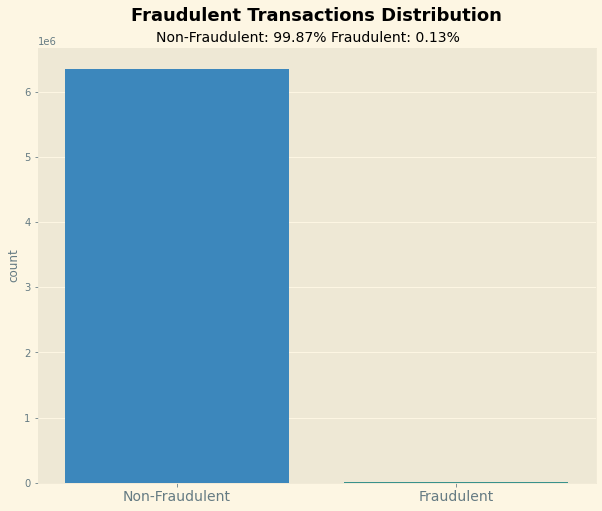

In [32]:
f, ax= plt.subplots(figsize= (10,8))

j= sns.countplot(x=df['isFraud'], ax= ax)

#Calculate % of fraudulent/non-fraudulent transactions
fraudulent= (len(df.loc[df['isFraud'] ==True, :])/len(df)) * 100
legit= (len(df.loc[df['isFraud'] == False, :])/len(df)) * 100

j.set_title('Fraudulent Transactions Distribution\n', fontsize= 18, fontweight= 'semibold')
plt.suptitle('Non-Fraudulent: %s Fraudulent: %s' % (str(round(legit,2))+'%', str(round(fraudulent,2))+'%'), y = .91, fontsize= 14)
j.set_xlabel('');
labels= ['Non-Fraudulent', 'Fraudulent']
plt.xticks(ticks= [0,1], labels= labels, fontsize= 14);

#Save plot
from src.data.import_export_data import save_plot
save_plot(j, config['paths']['figures'], 'targetDistribution.png')

Correlation Matrix

In [33]:
#Copy original df & drop 'isFlaggedFraud', 'nameOrig', 'nameDest' cols
temp= df.copy().drop(['isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1)

#Create dummies
dummies= pd.get_dummies(temp.iloc[:, :-1], drop_first=False)
dummies.loc[:,'isFraud']= temp.loc[:,'isFraud'].apply(lambda x: int(x))

dummies.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud
0,1,9839.640,170136.000,160296.360,0.000,0.000,0,0,0,1,0,0
1,1,1864.280,21249.000,19384.720,0.000,0.000,0,0,0,1,0,0
2,1,181.000,181.000,0.000,0.000,0.000,0,0,0,0,1,1
3,1,181.000,181.000,0.000,21182.000,0.000,0,1,0,0,0,1
4,1,11668.140,41554.000,29885.860,0.000,0.000,0,0,0,1,0,0


Successfully saved image to path


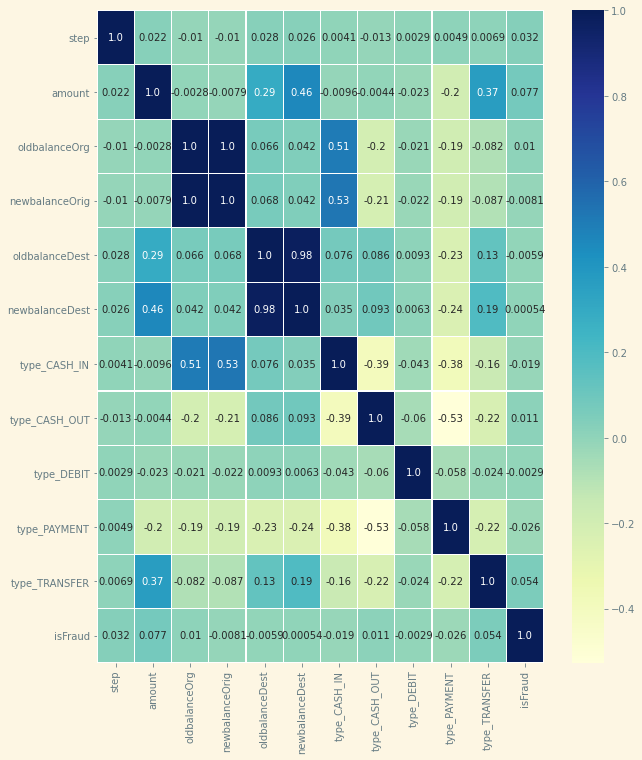

In [34]:
#Plot Heatmap
corr= dummies.corr()
f, ax= plt.subplots(figsize= (10,12))

j= sns.heatmap(corr, annot= True, linewidths=.1,
           fmt='.2',cmap= 'YlGnBu', ax=ax)

save_plot(plot= j, path= config['paths']['figures'], filename='HeatMap.png')

Successfully saved image to path


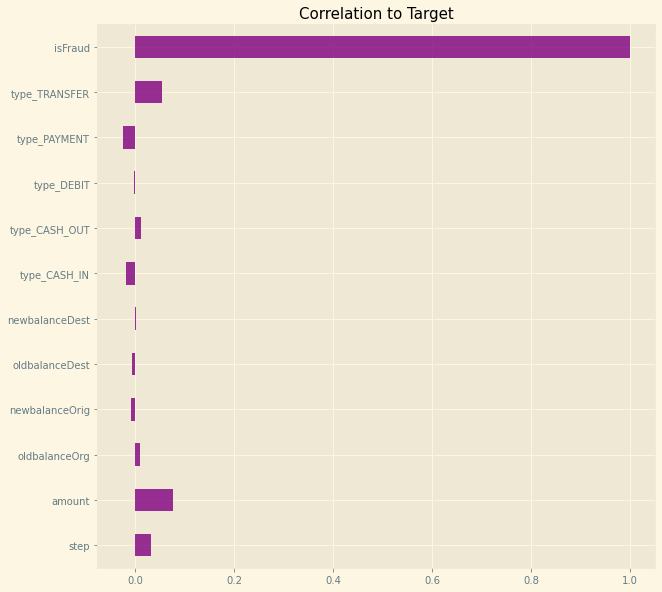

In [39]:
#Plot correlations to target
j= dummies.corr()['isFraud'].plot(kind= 'barh', color= 'purple', 
                                  alpha= .8, figsize= (10,10))

j.set_title('Correlation to Target', fontsize= 15);

save_plot(plot= j, path= config['paths']['figures'], filename='correlation.png')

Occurence of Fraud by Transaction Type

In [52]:
#What kind of transactions are fraudulent
df.loc[df['isFraud']==True, 'type'].value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

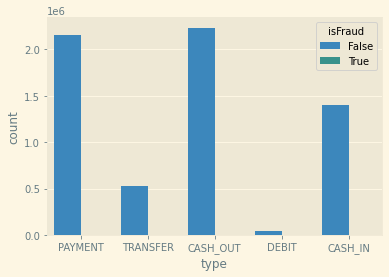

In [40]:
sns.countplot(x= df['type'], hue= df['isFraud'])

**Evaluating Predictions from Previous Model**

Looking at metrics, previous model was optimized for accuracy/precision. Previous prediction model performed very poorly at identifying which transactions are fraudulent. For our task, a False positive won't kill us (we can always verfiy the transaction later) but a False negative can ruin us.

We'll optimize our new models for Recall and F2.0 score (but we'll keep an eye on precision as well).

In [59]:
#Import Evaluation class
from src.models.metrics import Evaluation

#Convert dtypes from string to int to fit in model evaluation
for col in ['isFraud','isFlaggedFraud']:
    df[col]= [int(x) for x in df[col]]

#Init Evaluation using predictions from previous model
prevModel= Evaluation(predictions=df['isFlaggedFraud'].values,
                      actual= df['isFraud'].values)

print(prevModel.classification_metrics(beta= 2.0))
print(prevModel.confusion_matrix())

{'accuracy': 0.999, 'precision': 1.0, 'recall': 0.002, 'fbeta_score': 0.002}
[[6354407       0]
 [   8197      16]]


Successfully saved image to path


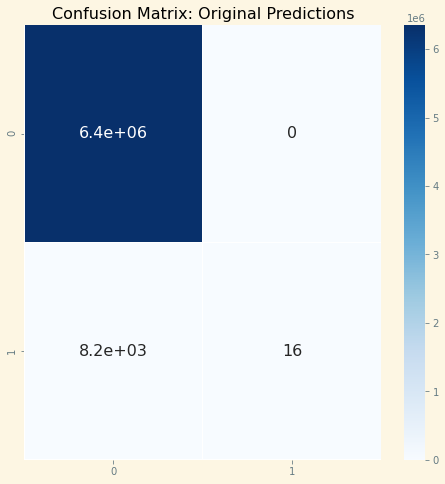

In [70]:
#Plot confustion matrix
f, ax= plt.subplots(figsize= (8,8))

j= sns.heatmap(pd.DataFrame(prevModel.confusion_matrix()), annot=True, 
                         annot_kws={"size": 16}, linewidths=.1, cmap= 'Blues',
                         ax= ax)

j.set_title('Confusion Matrix: Original Predictions');

save_plot(j, path= config['paths']['figures'], filename='matrix_originalPredictions.png')